In [1]:
import pandas as pd
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

##  图的构造

In [3]:
group=pd.read_csv('http://mirror.coggle.club/dataset/graph-wiki/group.txt.zip',sep="\t",header=None)

节点id，节点类别

In [4]:
group

,0,1
0,0,9
1,1,9
2,2,9
3,3,9
4,4,9
...,...,...
2400,2400,9
2401,2401,9
2402,2402,9
2403,2403,9


In [5]:
graph = pd.read_csv('http://mirror.coggle.club/dataset/graph-wiki/graph.txt.zip', sep='\t', header=None)

出发节点id，目的节点id

In [6]:
graph

,0,1
0,1397,1470
1,1397,362
2,1397,226
3,1397,750
4,1397,489
...,...,...
17976,1573,1573
17977,402,402
17978,2008,2008
17979,1520,1520


In [7]:
g=nx.DiGraph()

In [8]:
g.add_edges_from(graph.values[:100])

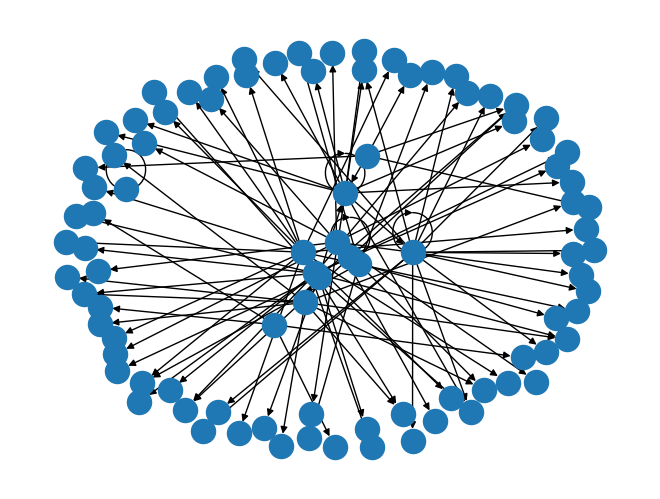

In [9]:
nx.draw_spring(g)

## 图的查询和遍历

In [10]:
g.number_of_edges()

97

In [11]:
g.number_of_nodes()

90

In [12]:
np.mean([x[1] for x in list(g.degree())])

2.1555555555555554

In [13]:
a=list(g.degree())
a.sort(key=lambda x:x[0])

In [14]:
g.degree()[1397]

6

In [15]:
(nx.dfs_tree(g,1615,depth_limit=0).nodes)

NodeView((1615, 1616, 713, 2158, 1624, 2165, 2167, 1630, 1631, 1640, 1659, 1662, 2280, 2307))

In [16]:
(nx.bfs_tree(g,1615)).nodes()

NodeView((1615, 1616, 713, 2158, 1624, 2165, 2167, 1630, 1631, 1640, 1659, 1662, 2280, 2307))

In [17]:
list(nx.all_simple_paths(g,1397,1470))

[[1397, 1470]]

从1397到1470的路径,cutoff为长度截断

In [18]:
list(nx.connectivity.node_disjoint_paths(g,1397,1470,cutoff=1))

[[1397, 1470]]

## 节点中心性与应用
步骤1：筛选度最大的Top10个节点，并对节点深度1以内的节点进行可视化；
步骤2：使用PageRank筛选Top10个节点，并对节点深度1以内的节点进行可视化；
步骤3：文本关键词提取算法RAKE
使用jieba对文本进行分词
单词作为节点，距离2以内的单词之间存在边
计算单词打分 wordDegree (w)/ wordFrequency (w)
按照打分统计每个文章Top10关键词
步骤4：文本关键词提取算法TextRank
使用jieba对文本进行分词
单词作为节点，距离2以内的单词之间存在边
使用PageRank对单词进行打分
按照打分统计每个文章Top10关键词

In [19]:
g_degree=pd.DataFrame(g.degree()).sort_values(by=1)

In [20]:
g_degree=g_degree.iloc[-10:]

In [21]:
g_degree

,0,1
79,1567,4
37,1535,5
0,1397,6
85,1005,7
69,186,9
63,15,10
52,16,12
10,696,15
22,1401,15
13,1615,16


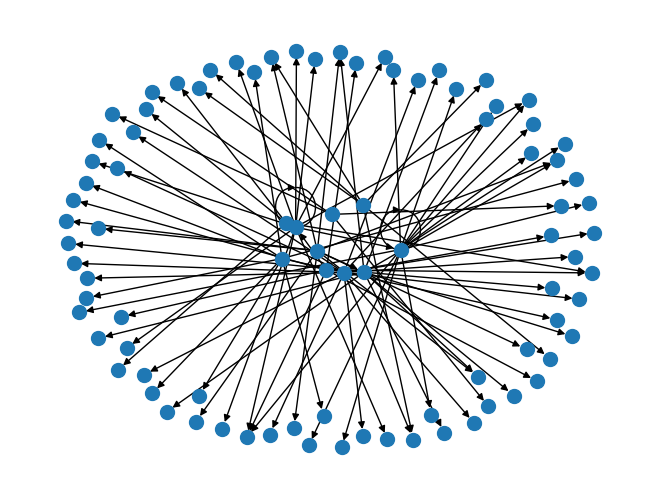

In [22]:
selected_nodes=[]
for node in g_degree[0].values:
    selected_nodes+=list(nx.dfs_tree(g,node,1).nodes())
nx.draw_spring(g.subgraph(selected_nodes),node_size=100)

In [23]:
type(nx.pagerank(g))

dict

In [24]:
g_pagerank=pd.DataFrame.from_dict(nx.pagerank(g),orient='index')


In [25]:
g_pagerank

,0
1397,0.009445
1470,0.010783
362,0.010783
226,0.011318
750,0.010783
...,...
1005,0.009445
695,0.010592
700,0.010592
714,0.010592


In [26]:
g_pagerank=g_pagerank.sort_values(by=0)

In [27]:
g_pagerank=g_pagerank.iloc[-10:]

In [28]:
g_pagerank[0].index

Int64Index([1592, 1597, 1601, 489, 713, 696, 1713, 393, 445, 1398], dtype='int64')

In [29]:
selected_nodes=[]
for node in g_pagerank[0].index:
    selected_nodes+=list(nx.dfs_tree(g,node,1).nodes())

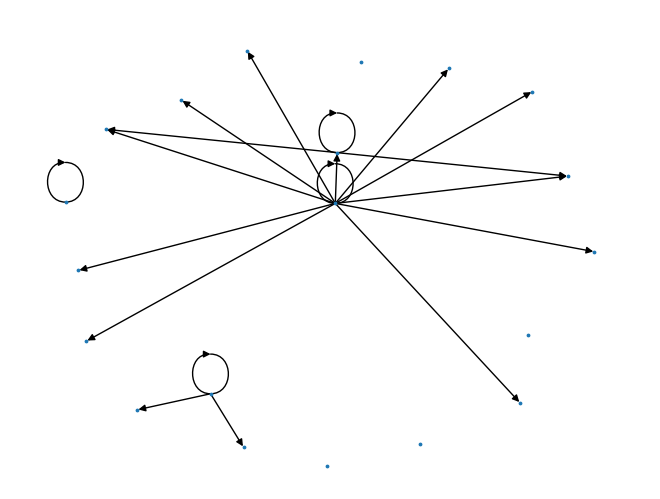

In [30]:
nx.draw_spring(g.subgraph(selected_nodes),node_size=3)

## 文本关键词提取算法RAKE

In [32]:
content="2021年，成都地区生产总值已经超过1.99万亿元，距离2万亿门槛仅咫尺之间。在去年遭受多轮疫情冲击及高温限电冲击的不利影响下，2022年，成都市实现地区生产总值20817.5亿元，按可比价格计算，比上年增长2.8%。成都因此成为第7个跨过GDP2万亿门槛的城市。目前，GDP万亿城市俱乐部中形成了4万亿、3万亿、2万亿和万亿这四个梯队。上海和北京在2021年跨过了4万亿，深圳2021年跨过了3万亿，重庆、广州、苏州和成都则是2万亿梯队。在排名前十的城市中，预计武汉将超过杭州。武汉市政府工作报告称，预计2022年武汉地区生产总值达到1.9万亿元左右。而杭州市统计局公布的数据显示，杭州2022年地区生产总值为18753亿元。受疫情影响，武汉在2020年GDP排名退居杭州之后。"

In [33]:
import jieba
from collections import Counter
g2=nx.Graph()
words=jieba.lcut(content)
words=[x for x  in words if len(x)>1]

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.662 seconds.
Prefix dict has been built successfully.


In [34]:
words

['2021',
 '成都地区',
 '生产总值',
 '已经',
 '超过',
 '1.99',
 '万亿元',
 '距离',
 '万亿',
 '门槛',
 '咫尺之间',
 '去年',
 '遭受',
 '多轮',
 '疫情',
 '冲击',
 '高温',
 '限电',
 '冲击',
 '不利',
 '影响',
 '2022',
 '成都市',
 '实现',
 '地区',
 '生产总值',
 '20817.5',
 '亿元',
 '可比价格',
 '计算',
 '上年',
 '增长',
 '2.8%',
 '成都',
 '因此',
 '成为',
 '跨过',
 'GDP2',
 '万亿',
 '门槛',
 '城市',
 '目前',
 'GDP',
 '万亿',
 '城市',
 '俱乐部',
 '形成',
 '万亿',
 '万亿',
 '万亿',
 '万亿',
 '四个',
 '梯队',
 '上海',
 '北京',
 '2021',
 '跨过',
 '万亿',
 '深圳',
 '2021',
 '跨过',
 '万亿',
 '重庆',
 '广州',
 '苏州',
 '成都',
 '万亿',
 '梯队',
 '排名',
 '前十',
 '城市',
 '预计',
 '武汉',
 '超过',
 '杭州',
 '武汉市',
 '政府',
 '工作',
 '报告',
 '预计',
 '2022',
 '武汉',
 '地区',
 '生产总值',
 '达到',
 '1.9',
 '万亿元',
 '左右',
 '杭州市',
 '统计局',
 '公布',
 '数据',
 '显示',
 '杭州',
 '2022',
 '地区',
 '生产总值',
 '18753',
 '亿元',
 '疫情',
 '影响',
 '武汉',
 '2020',
 'GDP',
 '排名',
 '退居',
 '杭州',
 '之后']

In [35]:
for i in range(len(words)-2):
    for j in range(i-2,i+2):
        if i ==j:
            continue
        g2.add_edge(words[i],words[j])

In [36]:
g2.degree()

DegreeView({'2021': 9, '杭州': 10, '之后': 2, '成都地区': 4, '生产总值': 13, '已经': 4, '超过': 8, '1.99': 4, '万亿元': 8, '距离': 4, '万亿': 22, '门槛': 7, '咫尺之间': 4, '去年': 4, '遭受': 4, '多轮': 4, '疫情': 8, '冲击': 6, '高温': 3, '限电': 3, '不利': 4, '影响': 8, '2022': 11, '成都市': 4, '实现': 4, '地区': 9, '20817.5': 4, '亿元': 7, '可比价格': 4, '计算': 4, '上年': 4, '增长': 4, '2.8%': 4, '成都': 8, '因此': 4, '成为': 4, '跨过': 8, 'GDP2': 4, '城市': 10, '目前': 4, 'GDP': 7, '俱乐部': 3, '形成': 3, '四个': 3, '梯队': 7, '上海': 4, '北京': 4, '深圳': 3, '重庆': 4, '广州': 4, '苏州': 4, '排名': 7, '前十': 4, '预计': 7, '武汉': 11, '武汉市': 4, '政府': 4, '工作': 4, '报告': 4, '达到': 4, '1.9': 4, '左右': 4, '杭州市': 4, '统计局': 4, '公布': 4, '数据': 4, '显示': 4, '18753': 4, '2020': 4, '退居': 3})

In [37]:
g2_node_gree=dict(g2.degree())

In [39]:
g2_node_gree

{'2021': 9,
 '杭州': 10,
 '之后': 2,
 '成都地区': 4,
 '生产总值': 13,
 '已经': 4,
 '超过': 8,
 '1.99': 4,
 '万亿元': 8,
 '距离': 4,
 '万亿': 22,
 '门槛': 7,
 '咫尺之间': 4,
 '去年': 4,
 '遭受': 4,
 '多轮': 4,
 '疫情': 8,
 '冲击': 6,
 '高温': 3,
 '限电': 3,
 '不利': 4,
 '影响': 8,
 '2022': 11,
 '成都市': 4,
 '实现': 4,
 '地区': 9,
 '20817.5': 4,
 '亿元': 7,
 '可比价格': 4,
 '计算': 4,
 '上年': 4,
 '增长': 4,
 '2.8%': 4,
 '成都': 8,
 '因此': 4,
 '成为': 4,
 '跨过': 8,
 'GDP2': 4,
 '城市': 10,
 '目前': 4,
 'GDP': 7,
 '俱乐部': 3,
 '形成': 3,
 '四个': 3,
 '梯队': 7,
 '上海': 4,
 '北京': 4,
 '深圳': 3,
 '重庆': 4,
 '广州': 4,
 '苏州': 4,
 '排名': 7,
 '前十': 4,
 '预计': 7,
 '武汉': 11,
 '武汉市': 4,
 '政府': 4,
 '工作': 4,
 '报告': 4,
 '达到': 4,
 '1.9': 4,
 '左右': 4,
 '杭州市': 4,
 '统计局': 4,
 '公布': 4,
 '数据': 4,
 '显示': 4,
 '18753': 4,
 '2020': 4,
 '退居': 3}

In [38]:
word_counter=dict(Counter(words))

In [40]:
g2_node_gree=pd.DataFrame.from_dict(g2_node_gree,orient='index')

In [41]:
g2_node_gree.columns=['degree']

In [42]:
g2_node_gree

,degree
2021,9
杭州,10
之后,2
成都地区,4
生产总值,13
...,...
数据,4
显示,4
18753,4
2020,4


In [43]:
g2_node_gree['freq']=g2_node_gree.index.map(word_counter)

In [46]:
g2_node_gree['score']=g2_node_gree['degree']/g2_node_gree['freq']

In [49]:
g2_node_gree.sort_values(by='score').index[-10:]

Index(['增长', '2.8%', '成都', '2020', '成为', '超过', 'GDP2', '目前', '可比价格', '因此'], dtype='object')

In [50]:
g2_node_gree.sort_values(by='score').iloc[-10:]

,degree,freq,score
增长,4,1,4.0
2.8%,4,1,4.0
成都,8,2,4.0
2020,4,1,4.0
成为,4,1,4.0
超过,8,2,4.0
GDP2,4,1,4.0
目前,4,1,4.0
可比价格,4,1,4.0
因此,4,1,4.0


## 文本关键词提取算法TextRank

In [51]:
g2=nx.Graph()
words=jieba.lcut(content)
words=[x for x in words if len(x)>1]
for i in range(len(words)-2):
    for j in range(i-2,i+2):
        if i == j:
            continue
        g2.add_edge(words[i],words[j])

In [52]:
g2_node_gree=pd.DataFrame.from_dict(nx.pagerank(g2),orient='index')

In [53]:
g2_node_gree

,0
2021,0.022903
杭州,0.024408
之后,0.006756
成都地区,0.011529
生产总值,0.030740
...,...
数据,0.011873
显示,0.011357
18753,0.010557
2020,0.010304


In [57]:
g2_node_gree.sort_values(by=0,inplace=True)

In [64]:
list(g2_node_gree.index[-10:].values)

['万亿元', '成都', '地区', '2021', '城市', '杭州', '武汉', '2022', '生产总值', '万亿']

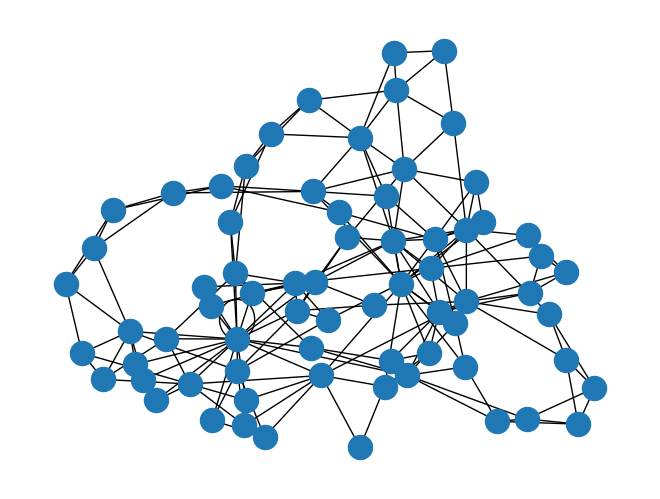

In [59]:
nx.draw_spring(g2)

## 图节点嵌入算法：DeepWalk/node2vec

## deepwalk

In [65]:
import random
def deepwalk(G,walk_length):
    nodes=G.nodes()
    history_walks=[]
    for node in nodes:
        random_walk_length=[node]
        for i in range(walk_length-1):
            neighbors=list(G.neighbors(node))
            neighbors=list(set(neighbors)-set(random_walk_length))
            if len(neighbors)==0:
                break
            random_neighbor=random.choice(neighbors)
            random_walk_length.append(random_neighbor)
            node=random_neighbor
        history_walks.append(random_walk_length)
    return history_walks


In [66]:
graph

,0,1
0,1397,1470
1,1397,362
2,1397,226
3,1397,750
4,1397,489
...,...,...
17976,1573,1573
17977,402,402
17978,2008,2008
17979,1520,1520


In [78]:
g=nx.DiGraph()
g.add_edges_from(graph.values[:])
history_walks=deepwalk(g,100)
from gensim.models import Word2Vec
w2v=Word2Vec(history_walks,vector_size=50,window=5)
node_group=group.iloc[list(w2v.wv.key_to_index.keys())][1].values

In [81]:
w2v.wv.key_to_index

{445: 0,
 393: 1,
 489: 2,
 235: 3,
 1412: 4,
 228: 5,
 400: 6,
 277: 7,
 458: 8,
 525: 9,
 1467: 10,
 708: 11,
 1466: 12,
 397: 13,
 1637: 14,
 1445: 15,
 1465: 16,
 1653: 17,
 713: 18,
 226: 19,
 1717: 20,
 1641: 21,
 31: 22,
 1621: 23,
 1654: 24,
 1413: 25,
 1401: 26,
 1434: 27,
 1684: 28,
 1476: 29,
 221: 30,
 1443: 31,
 247: 32,
 1430: 33,
 1478: 34,
 69: 35,
 1647: 36,
 185: 37,
 1460: 38,
 1832: 39,
 1636: 40,
 682: 41,
 496: 42,
 1446: 43,
 696: 44,
 1444: 45,
 1457: 46,
 1439: 47,
 1645: 48,
 526: 49,
 244: 50,
 1398: 51,
 89: 52,
 1661: 53,
 360: 54,
 1458: 55,
 1635: 56,
 236: 57,
 1459: 58,
 52: 59,
 1646: 60,
 1673: 61,
 3: 62,
 391: 63,
 245: 64,
 1627: 65,
 124: 66,
 242: 67,
 1629: 68,
 1509: 69,
 1450: 70,
 1525: 71,
 509: 72,
 399: 73,
 1416: 74,
 1638: 75,
 233: 76,
 90: 77,
 1468: 78,
 119: 79,
 26: 80,
 107: 81,
 1449: 82,
 410: 83,
 1722: 84,
 1428: 85,
 814: 86,
 229: 87,
 464: 88,
 734: 89,
 1498: 90,
 1461: 91,
 1573: 92,
 1648: 93,
 1411: 94,
 243: 95,
 1442: 

In [80]:
node_group

array([18, 18, 18, ...,  6, 13,  3])

In [70]:
group

,0,1
0,0,9
1,1,9
2,2,9
3,3,9
4,4,9
...,...,...
2400,2400,9
2401,2401,9
2402,2402,9
2403,2403,9


In [87]:
w2v.wv.most_similar(994)

[(766, 0.9768958687782288),
 (705, 0.9756344556808472),
 (751, 0.9718296527862549),
 (711, 0.9713834524154663),
 (781, 0.9663431644439697),
 (774, 0.9663280248641968),
 (803, 0.9637624025344849),
 (829, 0.9636029005050659),
 (2374, 0.9629527926445007),
 (806, 0.9629430770874023)]

/opt/anaconda3/envs/tweet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/tweet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


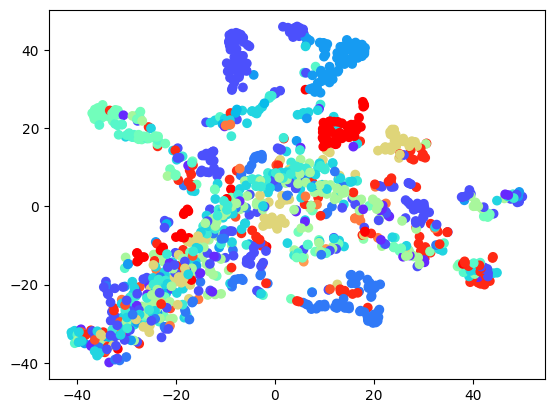

In [89]:
from sklearn.manifold import  TSNE
tsne=TSNE(n_components=2)
tsne_data=tsne.fit_transform(w2v.wv.vectors)
import matplotlib.cm as cm
x=np.arange(20)
ys=[i+x+(i*x)**2 for i in range(20)]
colors=cm.rainbow(np.linspace(0,1,len(ys)))
plt.scatter(tsne_data[:,0],tsne_data[:,1],color=colors[node_group])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_tr,x_val,y_tr,y_val=train_test_split(w2v.wv.vectors,node_group,random_state=3407,train_size=0.8,stratify=node_group)
model=LogisticRegression()
model.fit(x_tr,y_tr)
model.score(x_val,y_val)

0.5175097276264592

## node2vec
node2vec的游走策略（已经由节点t
游走到节点v
，下一步如何抉择），根据下面公式，计算出每个每个邻近节点的“值”，然后折算成概率，最后别名采样算法最终游走到的目标节点（p
越小，embedding越倾向于表达同质性；q
越小，embedding越倾向于表达结构性）。

假设上一步在顶点t
，当前在顶点v
，接下来需要计算走到顶点x
的“权重”。dtx=0,1,2
分别表示下一步走回t
，走到x1
，走到x2
或x3
的权重。（对应距离上一步位置t与下一步位置x的距离分别是0,1，2）

In [98]:
def next_step(graph,previous,current,p,q):
    neighbors=list(graph.neighbors(current))
    if len(neighbors)==0:
        return None
    weights=[]
    for neighbor in neighbors:
        if neighbor==previous:
            weights.append((1/p))
        elif graph.has_edge(neighbor,previous):
            weights.append(1)
        else:
            weights.append(1/q)

    weights_sum=sum(weights)
    prob=[weight/weights_sum for weight in weights]
    return np.random.choice(neighbors,size=1,p=prob)[0]

In [128]:
from  tqdm.auto import tqdm
def random_walk(graph,num_walks,num_steps,p,q):
    walks=[]
    nodes=list(graph.nodes())
    for walk_iteraiton in range(num_walks):
        random.shuffle(nodes)
        for node in tqdm(nodes):
            walk=[node]
            while len(walk)<num_steps:
                current=walk[-1]
                previous=walk[-2] if len(walk)>1 else None
                next=next_step(graph,previous,current,p,q)
                if next:
                    walk.append(next)
                else:
                    break
            walks.append(walk)
    return walks

In [129]:
p=1
q=4

In [130]:
num_walks=5
num_steps=100

In [131]:
walks=random_walk(g,num_walks,num_steps,p,q)

  0%|          | 0/2405 [00:00<?, ?it/s]

  0%|          | 0/2405 [00:00<?, ?it/s]

  0%|          | 0/2405 [00:00<?, ?it/s]

  0%|          | 0/2405 [00:00<?, ?it/s]

  0%|          | 0/2405 [00:00<?, ?it/s]

In [132]:
walks

[[1016,
  1576,
  713,
  807,
  713,
  1565,
  1555,
  1585,
  1600,
  1597,
  1585,
  1592,
  1575,
  1601,
  1567,
  1592,
  1585,
  1632,
  1555,
  1592,
  1585,
  1597,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890,
  890],
 [981,
  909,
  909,
  909,
  895,
  982,
  901,
  901,
  901,
  982,
  982,
  23,
  25,
  43,
  31,
  89,
  31,
  1412,
  1421,
  1480,
  228,
  1441,
  1452,
  228,
  1466,
  1408,
  228,
  233,
  243,
  229,
  226,
  226,
  225,
  229,
  229,
  241,
  247,
  225,
  228,
  232,

In [135]:
vec=Word2Vec(walks,vector_size=50,window=5)

In [146]:
node_group1=group.iloc[list(vec.wv.key_to_index.keys())][1].values

In [147]:
node_group1

array([ 6, 10, 10, ...,  6, 18,  6])

In [148]:
x1_tr,x1_val,y1_tr,y1_val=train_test_split(vec.wv.vectors,node_group1,random_state=3407,stratify=node_group1,train_size=0.8)
model1=LogisticRegression()
model1.fit(x1_tr,y1_tr)
model1.score(x1_val,y1_val)

/opt/anaconda3/envs/tweet/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5904365904365905

/opt/anaconda3/envs/tweet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/tweet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


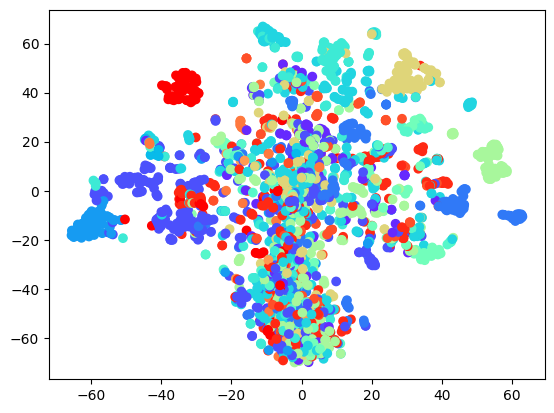

In [156]:
from sklearn.manifold import TSNE
tsne1=TSNE(n_components=2)
tsne1_data=tsne1.fit_transform(vec.wv.vectors)
colors1=cm.rainbow(np.linspace(0,1,20))
plt.scatter(tsne1_data[:,0],tsne1_data[:,1],color=colors1[node_group1])


## 任务5：图节点嵌入算法LINE/SDNE
步骤1：使用LINE对Wiki数据集节点嵌入，维度为50维
步骤2：每个group中20%的节点作为验证集，剩余的作为训练集
步骤3：使用节点嵌入向量 + 逻辑回归进行训练，并记录验证集准确率
步骤4：使用SDNE重复上述操作
步骤5：使用t-SNE将节点的LINE/SDNE特征降维，绘制散点图，节点颜色使用group进行区分

In [149]:
import  numpy as np
from ge.

array([ 6, 10, 10, ...,  6, 18,  6])

In [151]:
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.98039216e-01, 1.59475791e-01, 9.96795325e-01, 1.00000000e+00],
       [2.96078431e-01, 3.14869589e-01, 9.87201840e-01, 1.00000000e+00],
       [1.86274510e-01, 4.73093557e-01, 9.69796936e-01, 1.00000000e+00],
       [8.43137255e-02, 6.07538946e-01, 9.47177357e-01, 1.00000000e+00],
       [2.54901961e-02, 7.34844967e-01, 9.16033601e-01, 1.00000000e+00],
       [1.27450980e-01, 8.33602385e-01, 8.81012194e-01, 1.00000000e+00],
       [2.37254902e-01, 9.16033601e-01, 8.36989108e-01, 1.00000000e+00],
       [3.39215686e-01, 9.68276041e-01, 7.90532412e-01, 1.00000000e+00],
       [4.49019608e-01, 9.96795325e-01, 7.34844967e-01, 1.00000000e+00],
       [5.50980392e-01, 9.96795325e-01, 6.78235117e-01, 1.00000000e+00],
       [6.60784314e-01, 9.68276041e-01, 6.12420203e-01, 1.00000000e+00],
       [7.62745098e-01, 9.16033601e-01, 5.47219547e-01, 1.00000000e+00],
       [8.72549020e-01, 8.33602385e-01, 4.73093557e

任务6：图节点嵌入算法：GraphGAN
步骤1：使用GraphGAN对Wiki数据集节点嵌入，维度为50维
步骤2：每个group中20%的节点作为验证集，剩余的作为训练集
步骤3：使用节点嵌入向量 + 逻辑回归进行训练，并记录验证集准确率
步骤4：使用t-SNE将节点的GraphGAN特征降维，绘制散点图，节点颜色使用group进行区分